#**Linear Regression(SGD)**



---
Importing the required packages


---



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [0]:
housing_data = california_housing.fetch_california_housing()

In [0]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [0]:
df = df[df.Target < 5]

In [0]:
X = df.MedInc
y = df.Target

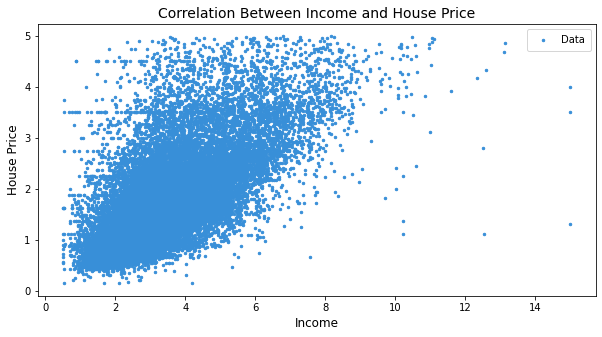

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [0]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
  m,b = 0.1,0.1
  mse = []
  for i in range(epochs):
    X = np.array(X)
    y = np.array(y)
    list_idx = np.arange(0,len(X))
    idx = random.choice(list_idx)
    Xs = X[idx]
    ys = y[idx]
    N = batch_size
    f = ys - (m*Xs + b)
    # Updating parameters m and b
    m = m - lr * (-2 * np.sum(np.dot(Xs,f)) / N)
    b = b - lr * (-2 * np.sum(f) / N)
    mse.append(mean_squared_error(y,(m*X+b)))       
    
  return m, b, mse

In [0]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

MSE: 0.5710906123055615


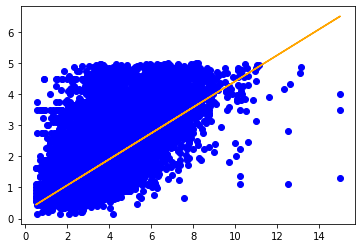

In [50]:
y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))
plt.scatter(X, y, c='blue') #data
plt.plot(X, y_pred, c='orange')  #Regression line
#plt.show()

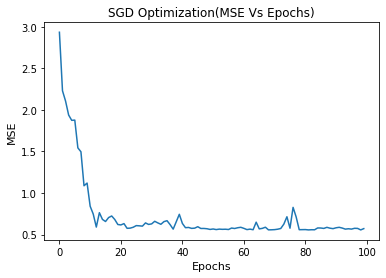

In [51]:
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization(MSE Vs Epochs)')
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

#**SVM**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [0]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



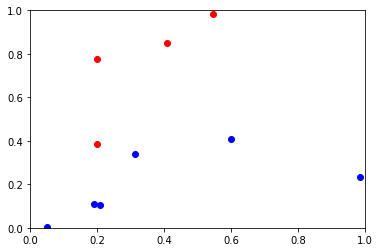

In [54]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [0]:
def svm_function(X, Y, epoch, alpha):
    w=np.zeros(len(X[0]))     
    for l in range(1,epoch):
         for i, x in enumerate(X):
            #X[i]=np.append(X[i],1) 
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + alpha * ( (X[i] * Y[i]) + (-2 *(1/l)* w) )
            else:
                w = w + alpha * (-2  *(1/l)* w)
    return w



---


**Run SVM Classifier**


---



In [56]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
b=np.ones((10,1))
X=np.concatenate((X,b),axis=1) 
w= svm_function(X, Y, 10000, 1)
#print(b)
print(w)       
print(X)
print(Y)
print(data)

[-13.22978674  11.50743857  -0.77648864]
[[0.04972929 0.00211482 1.        ]
 [0.31276872 0.33967146 1.        ]
 [0.54725628 0.98404247 1.        ]
 [0.98662986 0.23466622 1.        ]
 [0.19841828 0.38513764 1.        ]
 [0.20876376 0.10657418 1.        ]
 [0.19153131 0.10904886 1.        ]
 [0.19909909 0.77446184 1.        ]
 [0.40821065 0.84994347 1.        ]
 [0.59879336 0.40984956 1.        ]]
[-1. -1.  1. -1.  1. -1. -1.  1.  1. -1.]
[[ 0.04972929  0.00211482 -1.        ]
 [ 0.31276872  0.33967146 -1.        ]
 [ 0.54725628  0.98404247  1.        ]
 [ 0.98662986  0.23466622 -1.        ]
 [ 0.19841828  0.38513764  1.        ]
 [ 0.20876376  0.10657418 -1.        ]
 [ 0.19153131  0.10904886 -1.        ]
 [ 0.19909909  0.77446184  1.        ]
 [ 0.40821065  0.84994347  1.        ]
 [ 0.59879336  0.40984956 -1.        ]]


# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



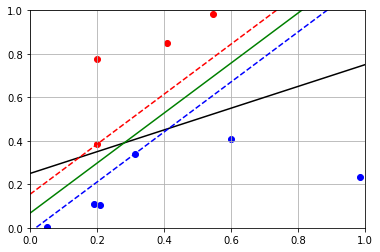

In [57]:
plt.grid()
x = np.linspace(0,1,100)
y=0.5*x+0.25
plt.plot(x, y, 'black')
x = np.linspace(0,1,100)
y=-(w[0]*x+w[2])/w[1]
y1=(y*w[1]+1)/w[1]
y2=(y*w[1]-1)/w[1]
plt.plot(x, y, 'green')
plt.plot(x, y1,'--',color='red')
plt.plot(x, y2,'--',color='blue')
#plt.plot(w,'green')
plt.xlim(0,1)
plt.ylim(0,1)
for x, y, l in data:
    if l == 1: 
         clr = 'red'
    else: 
         clr = 'blue'
    plt.scatter(x, y, c=clr)